In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sample_submission1.csv
/kaggle/input/test1.csv
/kaggle/input/train1.csv
/kaggle/input/data_description.txt


In [2]:
train=pd.read_csv("/kaggle/input/train1.csv")
test=pd.read_csv("/kaggle/input/test1.csv")
print(train.shape,test.shape)

(1460, 81) (1459, 80)


In [3]:
import numpy as np
import pandas as pd

#PLOTS
import seaborn as sns
import matplotlib.pyplot as plt

# STATS
from scipy.stats import skew,norm

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

In [4]:
## EDA
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


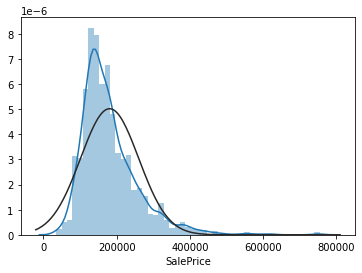

In [5]:
#Sales Price stats
ax = sns.distplot(train['SalePrice'],fit=norm)

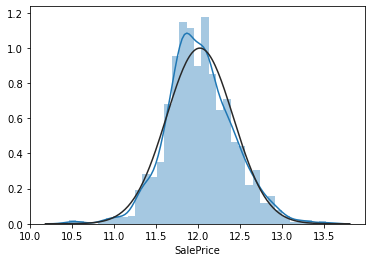

In [6]:
#sales price is skewed to the right.
train["SalePrice"] = np.log1p(train["SalePrice"])

#Let's again plot it
ax = sns.distplot(train['SalePrice'],fit=norm)

In [7]:
#skew and kurt
price=train["SalePrice"]
print(" Kurtosis:",price.kurt(),"\n","Skewness:" ,price.skew())

 Kurtosis: 0.809519155707878 
 Skewness: 0.12134661989685333


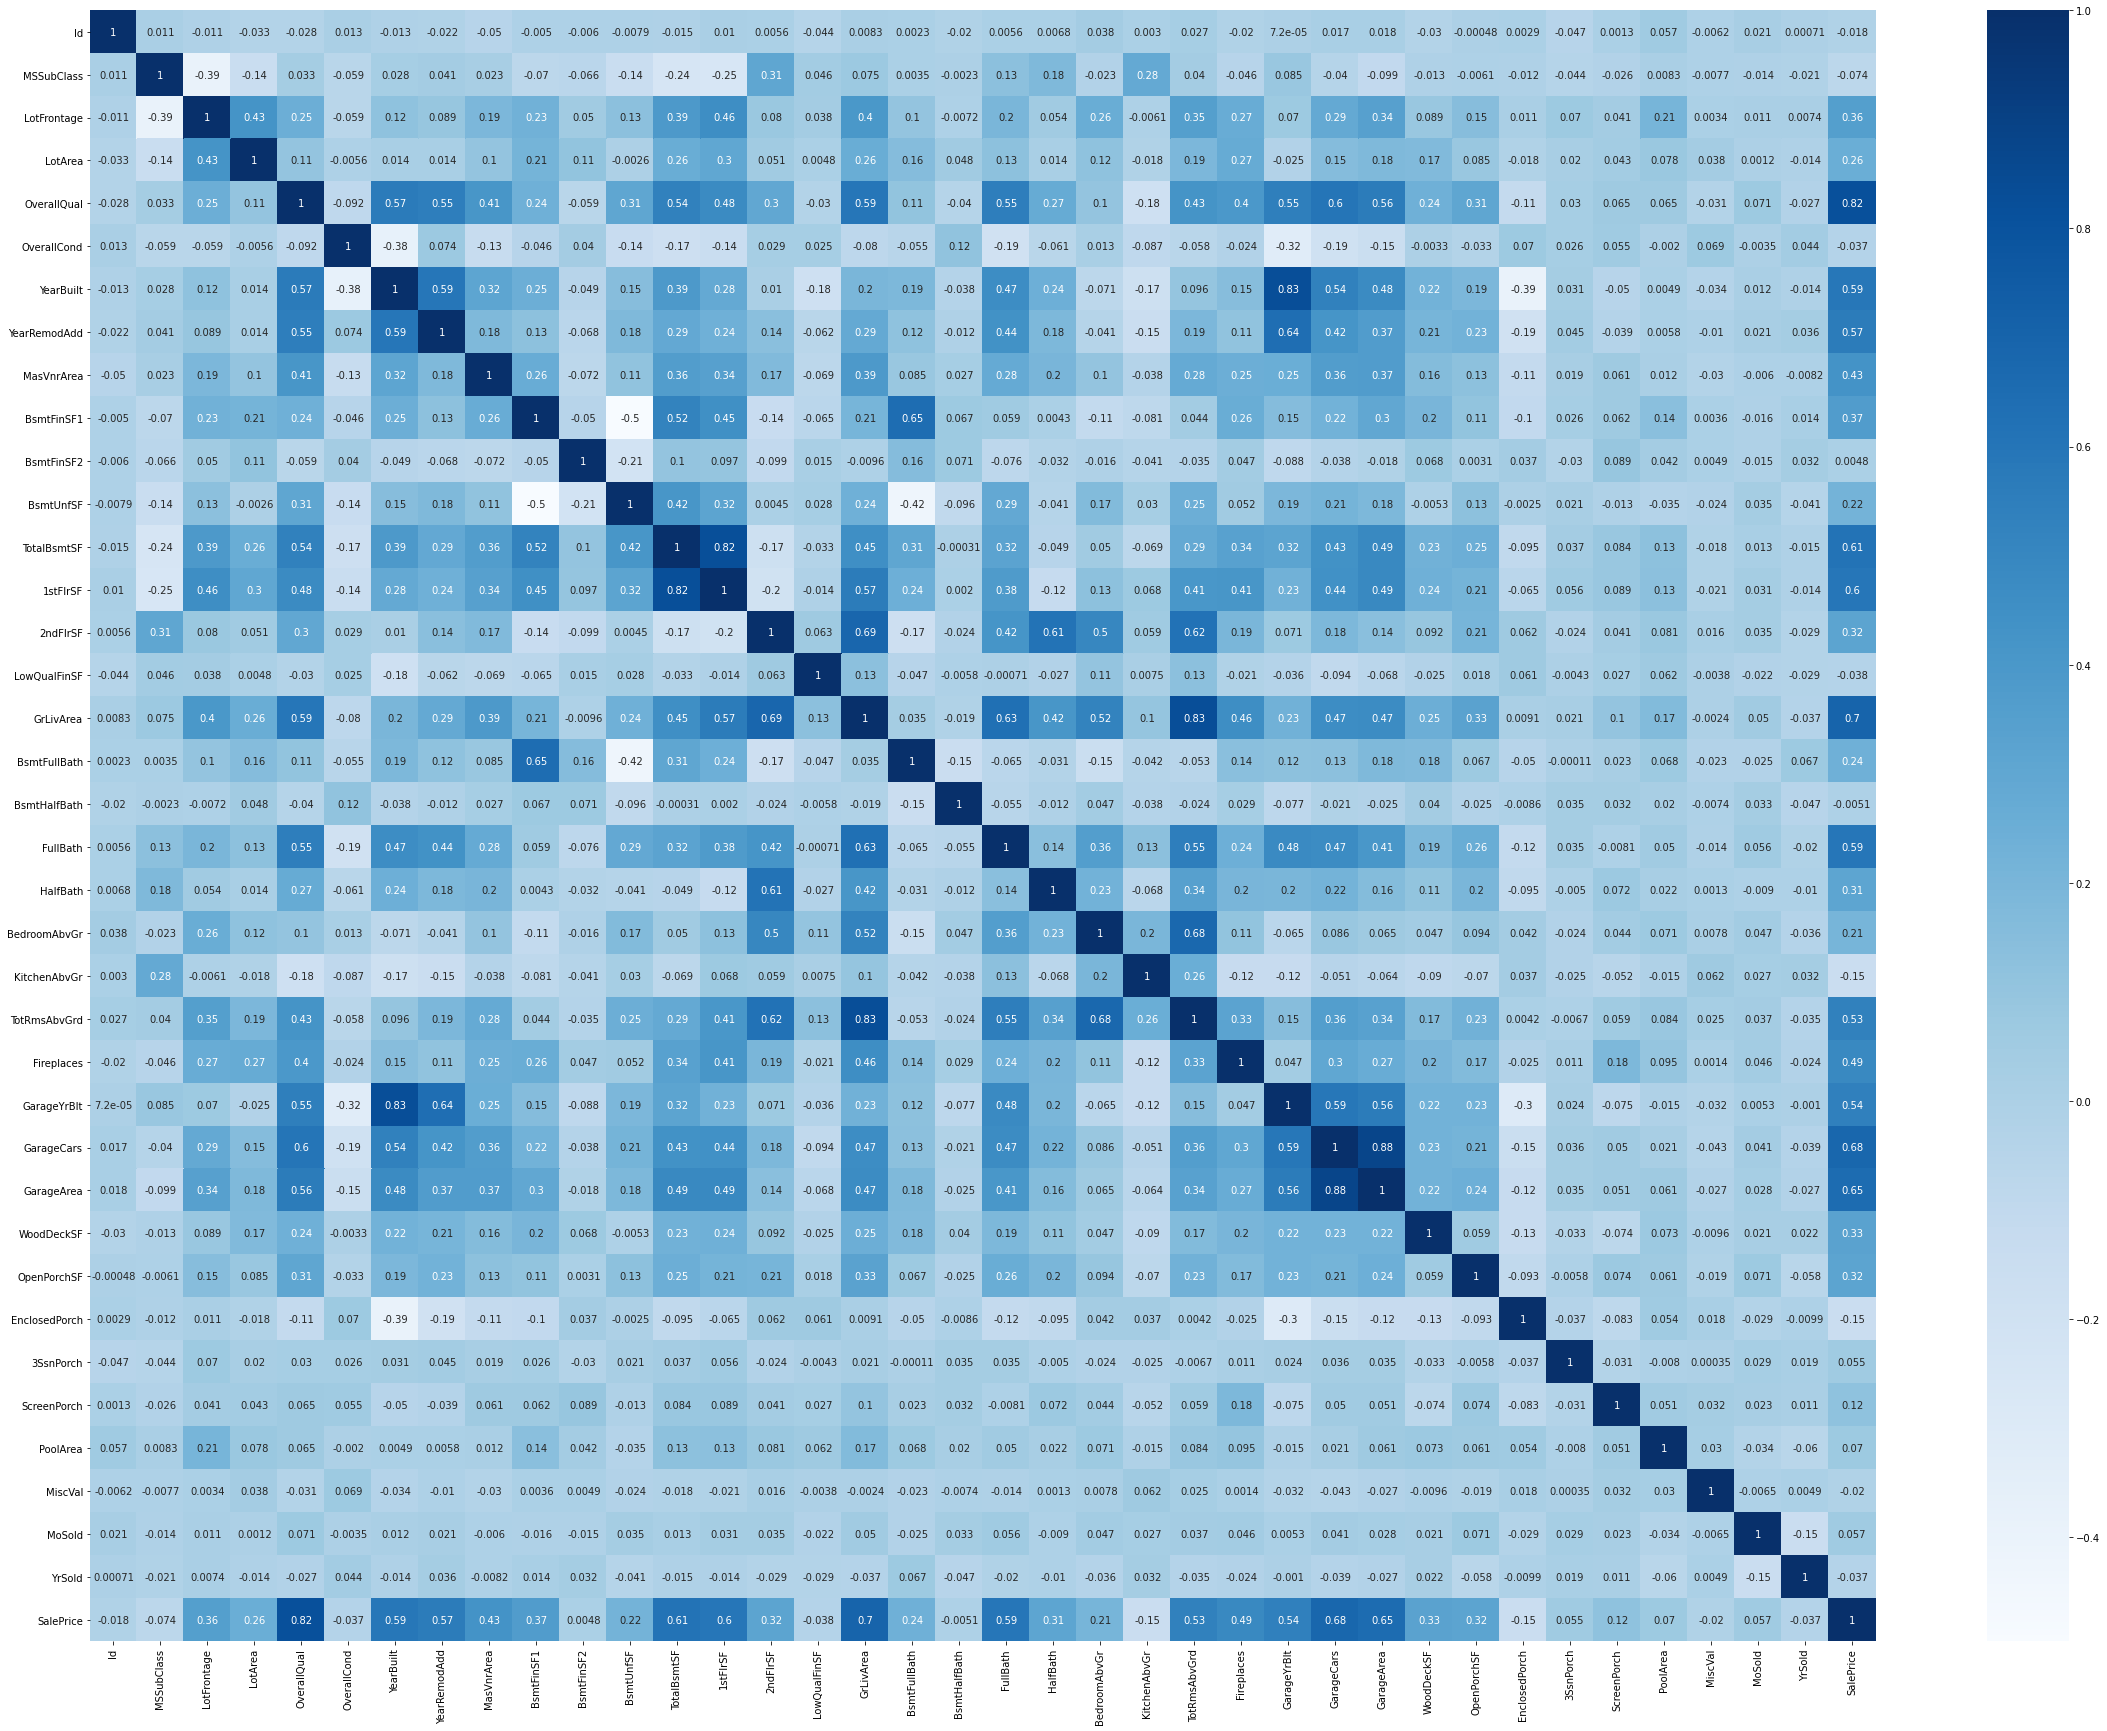

In [8]:
#Correlations among variables
corr=train.corr()
plt.figure(figsize=(40,30))
sns.heatmap(corr,annot=True,cmap='Blues')

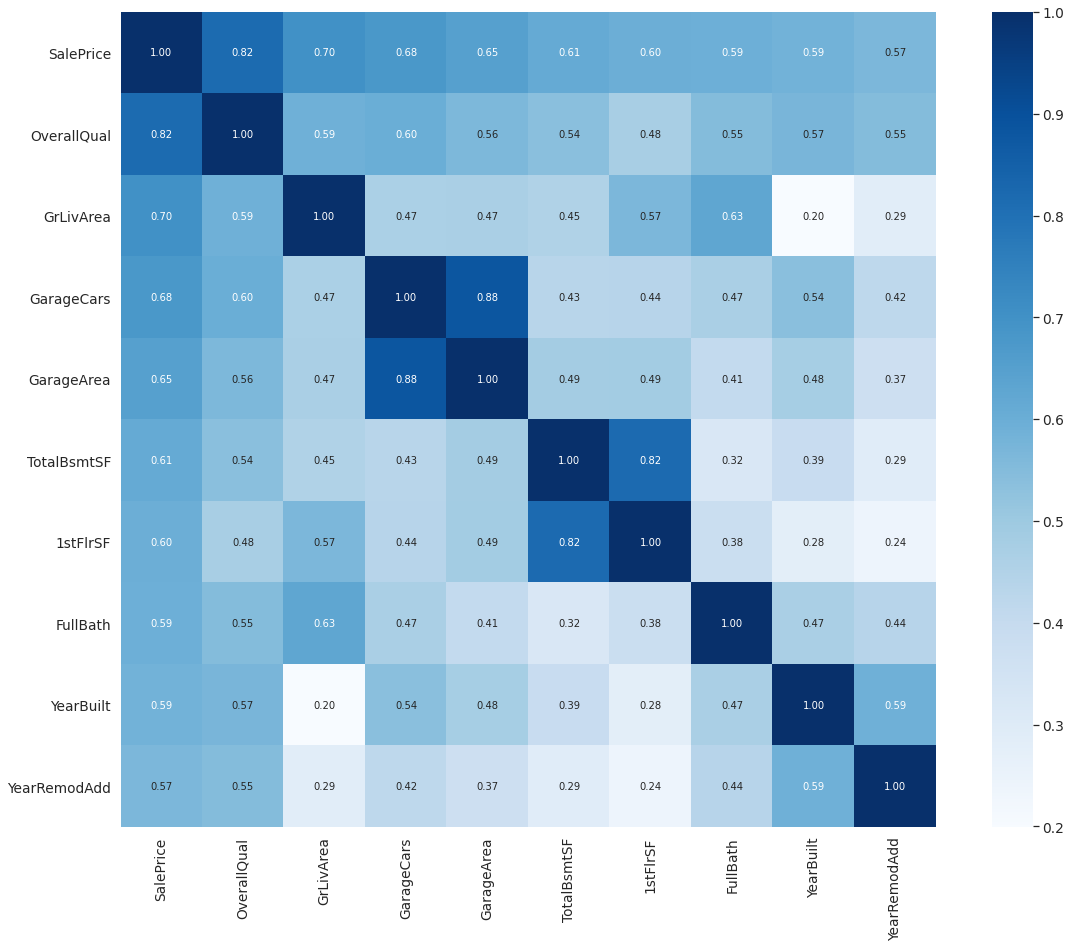

In [9]:
##saleprice correlation matrix                   //original site-https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#Out-liars!
k =10 #number of variables for heatmap           //cell-12
cols = corr.nlargest(k, 'SalePrice')
cols=cols['SalePrice']
cols_index=cols.index
# print(cols_index)
# p=train[cols_index].values
# print(p)
# print(p.shape)
cm = np.corrcoef(train[cols_index].values.T) 
# cm=pd.DataFrame(cm)
# print(cm)
# print(cm.shape)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap='Blues', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols_index, xticklabels=cols_index) 
plt.show()

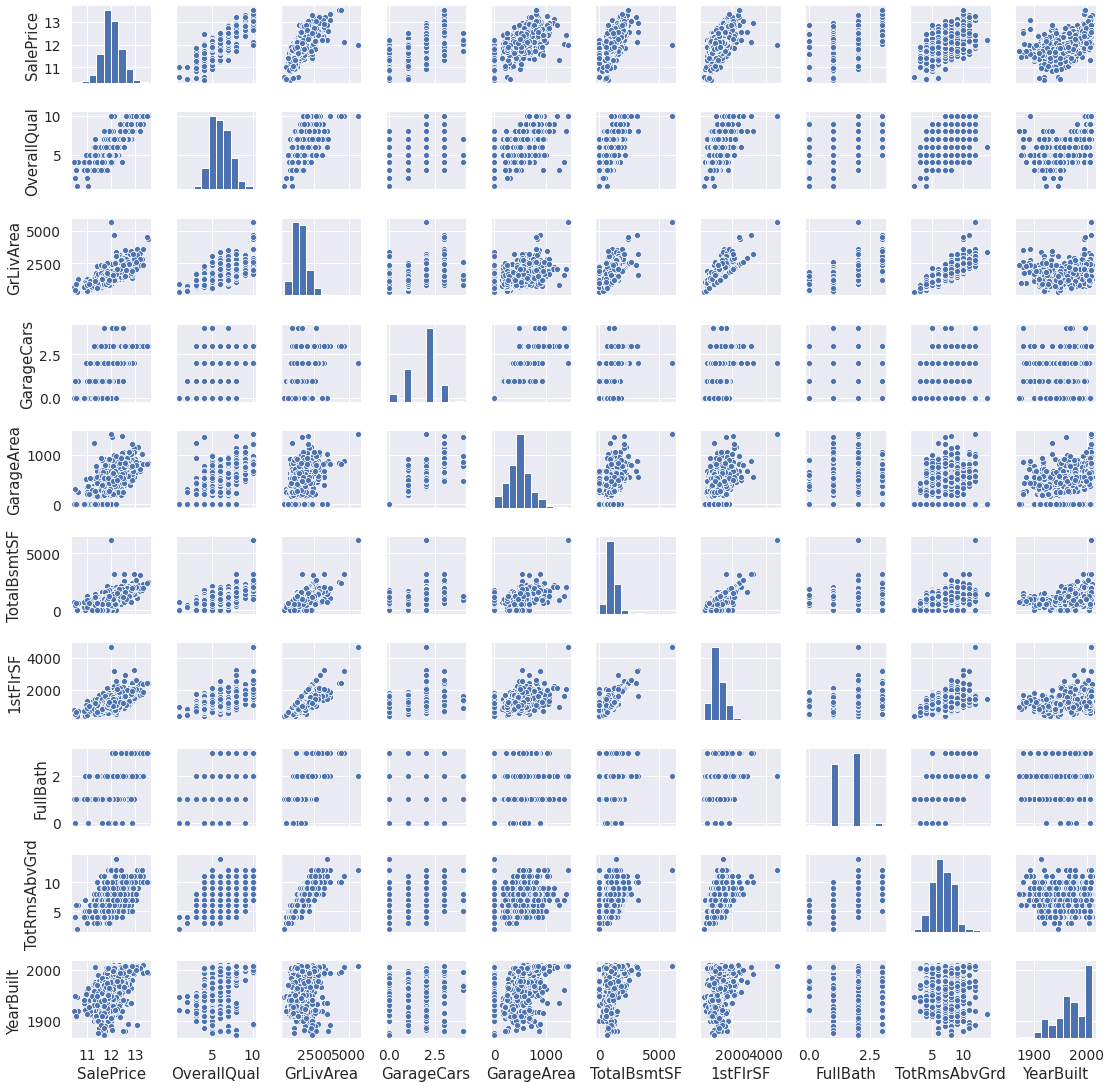

In [10]:
# Pairplots of highly correlated variables with sales price
cols=['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(train[cols],size=1.5)
plt.show()

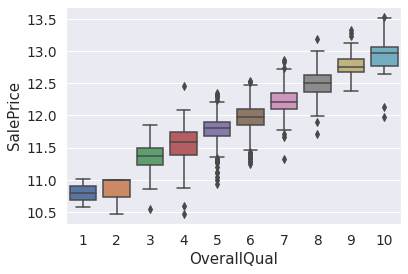

In [11]:
# Box plots 
ax = sns.boxplot(x="OverallQual", y="SalePrice", data=train)

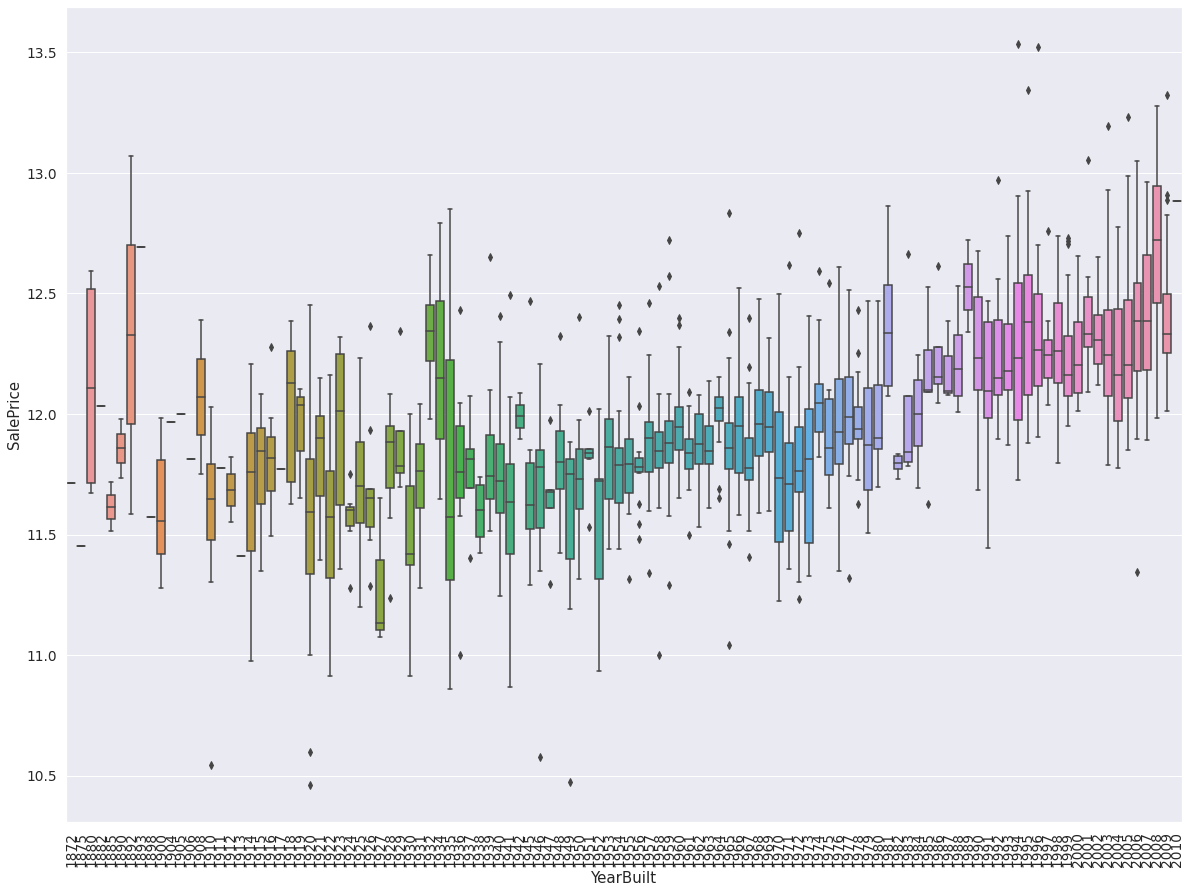

In [12]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
ax = sns.boxplot(x="YearBuilt", y="SalePrice", data=train)

FEATURE ENGINEERING

Removing outliers

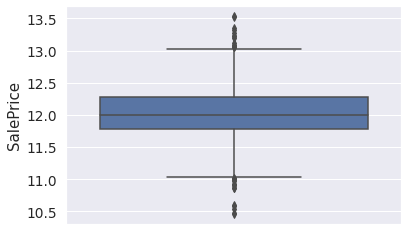

In [13]:
ax = sns.boxplot(y="SalePrice", data=train,orient='v')

(1460, 81)

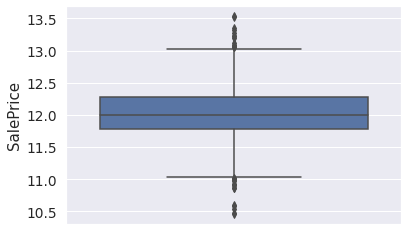

In [14]:
train.drop(train[train['SalePrice']>300000].index,inplace=True)
ax = sns.boxplot(y="SalePrice", data=train,orient='v')
train.shape

In [15]:
train_labels = train['SalePrice'].reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

# Combine train and test features in order to apply the feature transformation to the entire dataset
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features.shape

(2919, 80)

Handling missing values

In [16]:
total_missing=(all_features.isnull().sum()).sort_values(ascending=False)
missing_percent=(all_features.isnull().mean()*100).sort_values(ascending=False)
missing_data = pd.concat([total_missing, missing_percent],axis=1,keys=['total_missing','missing_percent'])
missing_data.head(35)

,total_missing,missing_percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageQual,159,5.447071
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071


In [17]:
all_features.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','GarageCond','GarageFinish','GarageQual','GarageType','BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2'], axis=1,inplace=True)
total_missing=(all_features.isnull().sum()).sort_values(ascending=False)
missing_percent=(all_features.isnull().mean()*100).sort_values(ascending=False)
missing_data = pd.concat([total_missing, missing_percent],axis=1,keys=['total_missing','missing_percent'])
missing_data.head(20)

,total_missing,missing_percent
LotFrontage,486,16.649538
GarageYrBlt,159,5.447071
MasVnrType,24,0.822199
MasVnrArea,23,0.787941
MSZoning,4,0.137033
Utilities,2,0.068517
BsmtHalfBath,2,0.068517
BsmtFullBath,2,0.068517
Functional,2,0.068517
KitchenQual,1,0.034258


In [18]:
all_features=all_features.fillna(train.mean()) 
total_missing=(all_features.isnull().sum()).sort_values(ascending=False)
missing_percent=(all_features.isnull().mean()*100).sort_values(ascending=False)
missing_data = pd.concat([total_missing, missing_percent],axis=1,keys=['total_missing','missing_percent'])
missing_data.head(20)

,total_missing,missing_percent
MasVnrType,24,0.822199
MSZoning,4,0.137033
Utilities,2,0.068517
Functional,2,0.068517
Electrical,1,0.034258
Exterior1st,1,0.034258
Exterior2nd,1,0.034258
KitchenQual,1,0.034258
SaleType,1,0.034258
MasVnrArea,0,0.000000


In [19]:
#replacing with its mode
all_features['Electrical']=all_features['Electrical'].fillna("SBrkr")   
all_features['MasVnrType']=all_features['MasVnrType'].fillna("None")

#'GarageX' variables have the same number of missing data. I bet missing data refers to the same set of observations.
#Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data,
#I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.
all_features.dropna(axis=0,inplace=True)
all_features.reset_index(drop=True,inplace=True)

In [20]:
#checking if still there is null values or not
total_missing=(all_features.isnull().sum()).sort_values(ascending=False)
missing_percent=(all_features.isnull().mean()*100).sort_values(ascending=False)
missing_data = pd.concat([total_missing, missing_percent],axis=1,keys=['total_missing','missing_percent'])
missing_data.head(20)
all_features

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
2906,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2907,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
2908,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


Handling skewed features

In [21]:
#getting all numerical features for calculation of skewness and boxplot
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in all_features.columns:
    if all_features[i].dtype in numeric_dtypes:
        numeric.append(i)

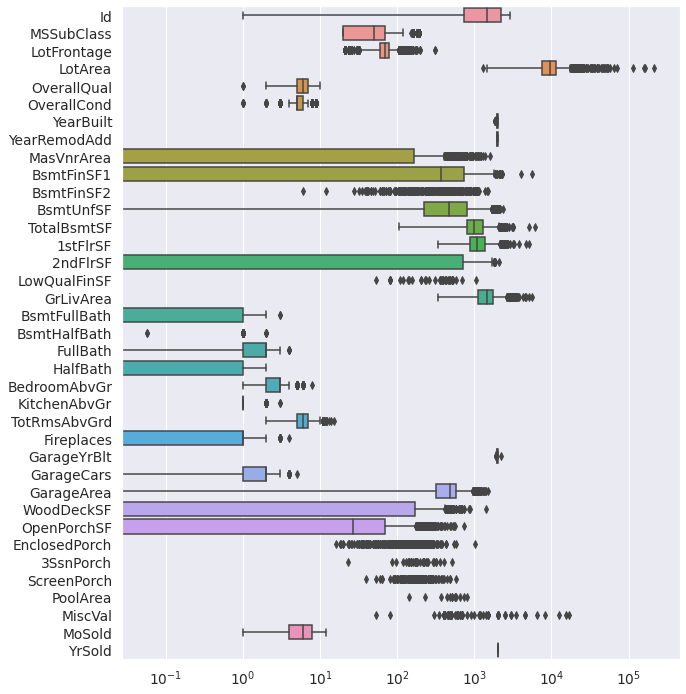

In [22]:
#Box plt for numeric features
f, ax = plt.subplots(figsize=(10, 12))
ax.set_xscale("log")
ax = sns.boxplot(data=all_features[numeric] , orient="h")

In [23]:
skew_features = all_features[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)
print(numeric)
skew_features.head(30)  #features having skewness>0.5 are high skewed

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


MiscVal          21.931067
PoolArea         16.871985
LotArea          13.088899
LowQualFinSF     12.102254
3SsnPorch        11.358122
KitchenAbvGr      4.294580
BsmtFinSF2        4.154798
EnclosedPorch     4.024629
ScreenPorch       3.943244
BsmtHalfBath      3.924179
MasVnrArea        2.609584
OpenPorchSF       2.536421
WoodDeckSF        1.838926
LotFrontage       1.632868
1stFlrSF          1.471616
BsmtFinSF1        1.424603
MSSubClass        1.372317
GrLivArea         1.269653
TotalBsmtSF       1.180281
BsmtUnfSF         0.919970
2ndFlrSF          0.859962
TotRmsAbvGrd      0.757917
Fireplaces        0.731701
HalfBath          0.692852
OverallCond       0.639265
BsmtFullBath      0.622050
BedroomAbvGr      0.329051
GarageArea        0.239831
OverallQual       0.228682
MoSold            0.198191
dtype: float64

In [24]:
#Feature Scaling(Normalising skewed features)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features=scaler.fit_transform(all_features[numeric].values)
scaled_features=pd.DataFrame(scaled_features)
scaled_features.columns=['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
all_features=all_features.drop(columns=numeric)
all_features=pd.concat([all_features, scaled_features],axis=1).reset_index(drop=True)
all_features

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0.346305,-0.742090,0.199224,-0.358548,-0.103492,-0.285968,-0.063248,-0.089301,-1.557067,0.157800
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,-0.062506,1.611646,-0.703618,-0.358548,-0.103492,-0.285968,-0.063248,-0.089301,-0.450039,-0.602461
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0.625040,-0.742090,-0.081989,-0.358548,-0.103492,-0.285968,-0.063248,-0.089301,1.025998,0.157800
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,0.782990,-0.742090,-0.185594,3.883768,-0.103492,-0.285968,-0.063248,-0.089301,-1.557067,-1.362722
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,1.684234,0.774411,0.539641,-0.358548,-0.103492,-0.285968,-0.063248,-0.089301,2.133026,0.157800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,-2.199476,-0.742090,-0.703618,-0.358548,-0.103492,-0.285968,-0.063248,-0.089301,-0.081030,-1.362722
2906,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,-0.870838,-0.742090,-0.348401,-0.358548,-0.103492,-0.285968,-0.063248,-0.089301,-0.819048,-1.362722
2907,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,0.476382,3.001771,-0.703618,-0.358548,-0.103492,-0.285968,-0.063248,-0.089301,1.025998,-1.362722
2908,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,-2.199476,-0.110214,-0.229996,-0.358548,-0.103492,-0.285968,-0.063248,1.143034,0.287979,-1.362722


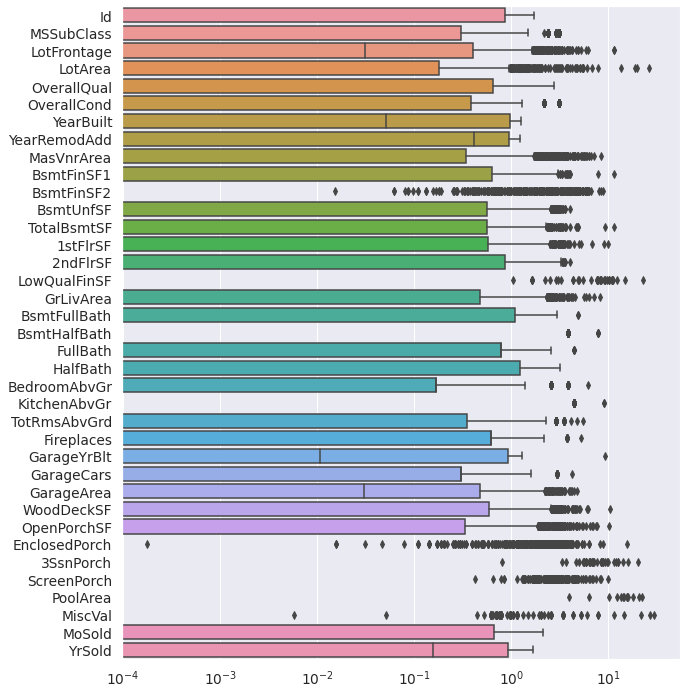

In [25]:
#checking fautures after normalisation
f, ax = plt.subplots(figsize=(10, 12))
ax.set_xscale("log")
ax = sns.boxplot(data= all_features , orient="h")

In [26]:
#checking skewness after normalisation
skew_features = all_features[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)
skew_features #skewness dont change after normalisation

MiscVal          21.931067
PoolArea         16.871985
LotArea          13.088899
LowQualFinSF     12.102254
3SsnPorch        11.358122
KitchenAbvGr      4.294580
BsmtFinSF2        4.154798
EnclosedPorch     4.024629
ScreenPorch       3.943244
BsmtHalfBath      3.924179
MasVnrArea        2.609584
OpenPorchSF       2.536421
WoodDeckSF        1.838926
LotFrontage       1.632868
1stFlrSF          1.471616
BsmtFinSF1        1.424603
MSSubClass        1.372317
GrLivArea         1.269653
TotalBsmtSF       1.180281
BsmtUnfSF         0.919970
2ndFlrSF          0.859962
TotRmsAbvGrd      0.757917
Fireplaces        0.731701
HalfBath          0.692852
OverallCond       0.639265
BsmtFullBath      0.622050
BedroomAbvGr      0.329051
GarageArea        0.239831
OverallQual       0.228682
MoSold            0.198191
FullBath          0.164569
YrSold            0.132431
Id                0.004475
GarageCars       -0.220881
GarageYrBlt      -0.388786
YearRemodAdd     -0.455237
YearBuilt        -0.604007
d

In [27]:
#Encode categorical features
all_features = pd.get_dummies(all_features).reset_index(drop=True)
all_features

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.728670,0.065624,-0.205847,-0.214360,0.644459,-0.517300,1.044156,0.895219,0.523606,0.578791,...,0,0,0,1,0,0,0,0,1,0
1,-1.727483,-0.874520,0.498369,-0.067407,-0.068612,2.201562,0.151046,-0.399604,-0.572978,1.175955,...,0,0,0,1,0,0,0,0,1,0
2,-1.726297,0.065624,-0.065004,0.143439,0.644459,-0.517300,0.978000,0.847263,0.333383,0.095791,...,0,0,0,1,0,0,0,0,1,0
3,-1.725110,0.300660,-0.440585,-0.073796,0.644459,-0.517300,-1.866723,-0.687342,-0.572978,-0.496981,...,0,0,0,1,1,0,0,0,0,0
4,-1.723923,0.065624,0.686160,0.528073,1.357529,-0.517300,0.944922,0.751350,1.385209,0.466823,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,1.729442,2.415984,-2.271546,-1.046754,-1.494752,1.295275,-0.047423,-0.687342,-0.572978,-0.971199,...,0,0,0,1,0,0,0,0,1,0
2906,1.730629,2.415984,-2.271546,-1.052121,-1.494752,-0.517300,-0.047423,-0.687342,-0.572978,-0.417945,...,0,0,0,1,1,0,0,0,0,0
2907,1.731816,-0.874520,4.254186,1.261561,-0.781682,1.295275,-0.378205,0.559524,-0.572978,1.716036,...,0,0,0,1,1,0,0,0,0,0
2908,1.733003,0.653214,-0.346690,0.040061,-0.781682,-0.517300,0.680296,0.367699,-0.572978,-0.231331,...,0,0,0,1,0,0,0,0,1,0


In [28]:
all_features.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.728670,0.065624,-0.205847,-0.214360,0.644459,-0.517300,1.044156,0.895219,0.523606,0.578791,...,0,0,0,1,0,0,0,0,1,0
1,-1.727483,-0.874520,0.498369,-0.067407,-0.068612,2.201562,0.151046,-0.399604,-0.572978,1.175955,...,0,0,0,1,0,0,0,0,1,0
2,-1.726297,0.065624,-0.065004,0.143439,0.644459,-0.517300,0.978000,0.847263,0.333383,0.095791,...,0,0,0,1,0,0,0,0,1,0
3,-1.725110,0.300660,-0.440585,-0.073796,0.644459,-0.517300,-1.866723,-0.687342,-0.572978,-0.496981,...,0,0,0,1,1,0,0,0,0,0
4,-1.723923,0.065624,0.686160,0.528073,1.357529,-0.517300,0.944922,0.751350,1.385209,0.466823,...,0,0,0,1,0,0,0,0,1,0


**Recreating training and test set**

In [29]:
train=all_features.iloc[:len(train_labels), :]
test=all_features.iloc[len(train_labels): , :]
train.shape,test.shape

((1460, 228), (1450, 228))

**Training different models**

In [30]:
# Setup cross validation folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model=LinearRegression()
rmse=np.sqrt(-cross_val_score(model, train, train_labels, scoring="neg_mean_squared_error", cv=kf))
print(np.mean(rmse))

835622641.7165642


In [32]:
regression_model=LinearRegression()
regression_model.fit(train,train_labels)
y_predicted = regression_model.predict(test)
y_predicted=pd.DataFrame(y_predicted)
y_predicted.columns=['SalePrice']
# y_predicted = y_predicted.reset_index()
# y_predicted.columns[1] = 'ID'
# y_predicted['ID'] = y_predicted.index + 1460
# y_predicted
df=y_predicted
df.insert(0, 'ID', range(1461, 1461 + len(df)))
df

,ID,SalePrice
0,1461,11.701004
1,1462,11.949104
2,1463,12.103622
3,1464,12.205536
4,1465,12.197426
...,...,...
1445,2906,11.336937
1446,2907,11.305958
1447,2908,12.050583
1448,2909,11.645119


In [33]:
# # XGBoost Regressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
# from xgboost import XGBRegressor
# xgboost = XGBRegressor(learning_rate=0.01,
#                        n_estimators=6000,
#                        max_depth=4,
#                        min_child_weight=0,
#                        gamma=0.6,
#                        subsample=0.7,
#                        colsample_bytree=0.7,
#                        objective='reg:squarederror',
#                        nthread=-1,
#                        scale_pos_weight=1,
#                        seed=27,
#                        reg_alpha=0.00006,
#                        random_state=42)
# model=xgboost
# rmse = np.sqrt(-cross_val_score(model, train, train_labels, scoring="neg_mean_squared_error", cv=kf))
# np.mean(rmse)

KeyboardInterrupt: 

In [ ]:
#can do with xgboost too but not done...learnt the concept behind it

In [ ]:
# Read in sample_submission dataframe
submission = pd.read_csv("/kaggle/input/sample_submission1.csv")
submission.shape

In [ ]:
# Append predictions from blended models
submission.iloc[:,1] = np.floor(np.expm1(y_predicted['SalePrice']))  #submitted after changing log(1+saleprice) to saleprice
submission.to_csv("submission_regression1.csv", index=False)